## Observations and Insights

In [1]:
'''
1. Only two drugs actually show tumor volume decrease, Capomulin and Ramicane. The others seem no different from placebo.

2. These two drugs also have the lowest variance in tumor volume, which also suggests they have a consistent effect.

3. As might be expected, tumor volume is strongly correlated with weight (r=.85 for final tumor volume vs. weight).

'''

'\n1. Only two drugs actually show tumor volume decrease, Capomulin and Ramicane. The others seem no different from placebo.\n\n2. These two drugs also have the lowest variance in tumor volume, which also suggests they have a consistent effect.\n\n3. As might be expected, tumor volume is strongly correlated with weight (r=.85 for final tumor volume vs. weight).\n\n'

## Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
data = pd.merge(mouse_metadata,study_results,on="Mouse ID")


## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

regimens = data.groupby("Drug Regimen")
tumor_mean = regimens.mean()['Tumor Volume (mm3)']
summary = pd.DataFrame({"mean":regimens.mean()['Tumor Volume (mm3)'],"median":regimens.median()['Tumor Volume (mm3)'],"variance":regimens.var()['Tumor Volume (mm3)'],"std dev":regimens.std()['Tumor Volume (mm3)'],"SEM":regimens.sem()['Tumor Volume (mm3)']})
print(summary)

                   mean     median   variance   std dev       SEM
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


## Bar plots

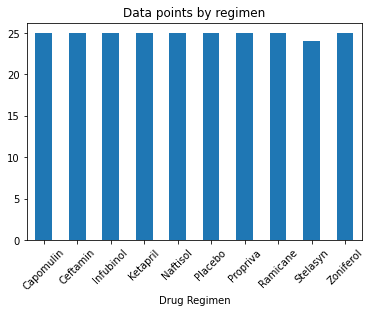

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
data_points = regimens.nunique()['Mouse ID']
data_points.plot(kind='bar', title="Data points by regimen", rot=45)

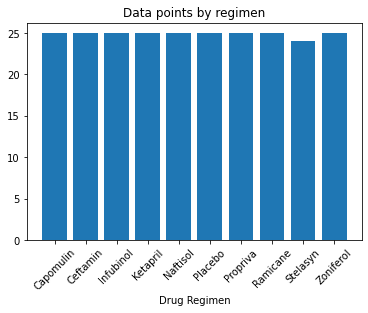

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.bar(data_points.index, data_points.values)
plt.title("Data points by regimen")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=45)
plt.show()

## Pie plots

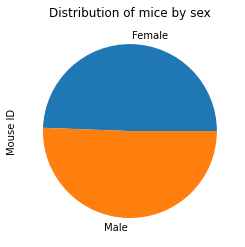

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sexes = data.groupby("Sex")
distrib = sexes.count()['Mouse ID']
distrib.plot(kind="pie", title="Distribution of mice by sex")

# I don't know how to get rid of "Mouse ID" on the chart

Text(0.5, 1.0, 'Distribution of mice by sex')

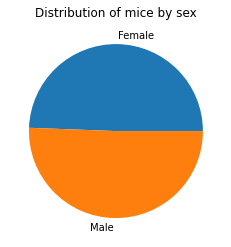

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(distrib.values,labels=distrib.index)
plt.title("Distribution of mice by sex")

## Quartiles, outliers and boxplots

In [8]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.

# First identify promising regimens by finding which drugs show the greatest average decreases in tumor volume from timepoint 0 to 45

regimens2 = data.groupby(["Drug Regimen","Timepoint"])
volumes_by_time_by_drug = regimens2.mean()['Tumor Volume (mm3)']
drugs = volumes_by_time_by_drug.index.levels[0]

results = {}
for drug in drugs:
    start_volume = volumes_by_time_by_drug[drug][0]
    end_volume = volumes_by_time_by_drug[drug][45]
    tumor_shrink = end_volume-start_volume
    results[drug]=tumor_shrink

# print(results)

# Only two drugs actually show tumor volume decrease, Capomulin and Ramicane. No others are really promising, but I added the next best two, Ceftamin and Infubinol, to get four total
# After doing the above I realized the specific drugs to look at were already listed in the instructions, but I left it in anyway

drugs = ['Capomulin','Ramicane','Ceftamin','Infubinol']

final_volumes = data.loc[data['Timepoint']==45,:]     # dataframe with just the data for the last timepoint

volumes = []    # this will contain four arrays of the final volume values for the four drugs

for d in range(len(drugs)):
    volumes.append(final_volumes.loc[final_volumes['Drug Regimen']==drugs[d],:]['Tumor Volume (mm3)'])

quartiles = []
for d in range(len(volumes)):
    quartiles.append(volumes[d].quantile([.25,.5,.75]))
                     
iqrs = []
lower_bounds = []
upper_bounds = []
for d in range(len(quartiles)):
    lowerq = quartiles[d][0.25]
    upperq = quartiles[d][0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    iqrs.append(iqr)
    lower_bounds.append(lower_bound)
    upper_bounds.append(upper_bound)

# DataFrame with the IQRs and lower and upper bounds per drug (not actually used, just for practice)   
quartiles_df = pd.DataFrame({"Drug":drugs,"IQR":iqrs,"Lower bound":lower_bounds,"Upper Bound":upper_bounds})

# search for potential outliers

for d in range(len(drugs)):
    high_outliers = any(x > upper_bounds[d] for x in volumes[d])
    low_outliers = any(x < lower_bounds[d] for x in volumes[d])
    if high_outliers or low_outliers:
        print("Potential outliers found in", drugs[d])
    else:
        print("No potential outliers found in", drugs[d])

No potential outliers found in Capomulin
No potential outliers found in Ramicane
No potential outliers found in Ceftamin
No potential outliers found in Infubinol


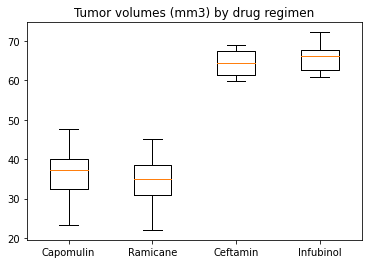

In [9]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(volumes,labels=drugs)
plt.title("Tumor volumes (mm3) by drug regimen")
plt.show()

# The values in this plot seem to be different from the ones I calculated above. I don't know if I did something wrong.

## Line and scatter plots

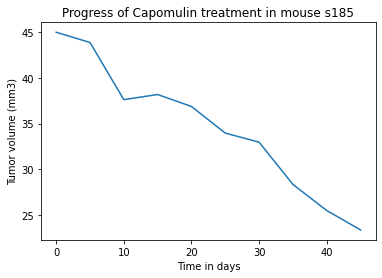

In [10]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# I chose mouse s185

mouse = data.loc[data['Mouse ID']=='s185',:]
times = mouse['Timepoint']
vols = mouse['Tumor Volume (mm3)']
plt.xlabel('Time in days')
plt.ylabel('Tumor volume (mm3)')
plt.title('Progress of Capomulin treatment in mouse s185')
plt.plot(times,vols)
plt.show()

In [11]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# I took this to mean "average *final* tumor volume". Since weight remains constant over time, there doesn't to be any point in plotting the weight at all the different timepoints.

cap_only = final_volumes.loc[final_volumes["Drug Regimen"]=="Capomulin",:]
weights = cap_only['Weight (g)']
vols = cap_only['Tumor Volume (mm3)']

plt.scatter(weights,vols)
plt.title("Final tumor volume vs. weight")
plt.xlabel("Weight (g)")
plt.ylabel("Final tumor volume (mm3)")
plt.show()

The correlation coefficient is 0.85


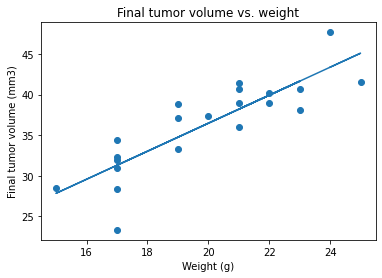

In [12]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

corr = st.pearsonr(weights,vols)[0]
print("The correlation coefficient is", round(corr,2))

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weights,vols)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(weights,vols)
plt.title("Final tumor volume vs. weight")
plt.xlabel("Weight (g)")
plt.ylabel("Final tumor volume (mm3)")
plt.plot(weights,weights*slope+intercept)
plt.show()
